# Project 1 INFS 3070

    Using the Video Game data set, you are to develop a presentation that shows answers to the following questions:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://128.198.162.191/dataFiles/VIDEO-GAMES/Video_Games.csv')

df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## What is the top video game by units?

    Data is in Millions of units.
    You should show the Game title and units.

In [21]:
top_game = df.loc[df['Global_Sales'].idxmax()]
top_game[['Name', 'Global_Sales']]

Name            Wii Sports
Global_Sales         82.53
Name: 0, dtype: object

## What is the top video game by the number of users?

    Ensure results are rounded to the nearest whole number.
    You should show the Game Title and the number of users.


In [22]:
top_game_users = df.loc[[df['User_Count'].idxmax()]].copy()
top_game_users['User_Count'] = top_game_users['User_Count'].round().astype(int)
top_game_users[['Name', 'User_Count']]

,Name,User_Count
2851,The Witcher 3: Wild Hunt,10665


## What are the 10 most successful games in North America by units?

    This is to be plotted in a bar chart.
        Display the Game Title on the 'X' axis.
        Display the units on the 'Y' axis.


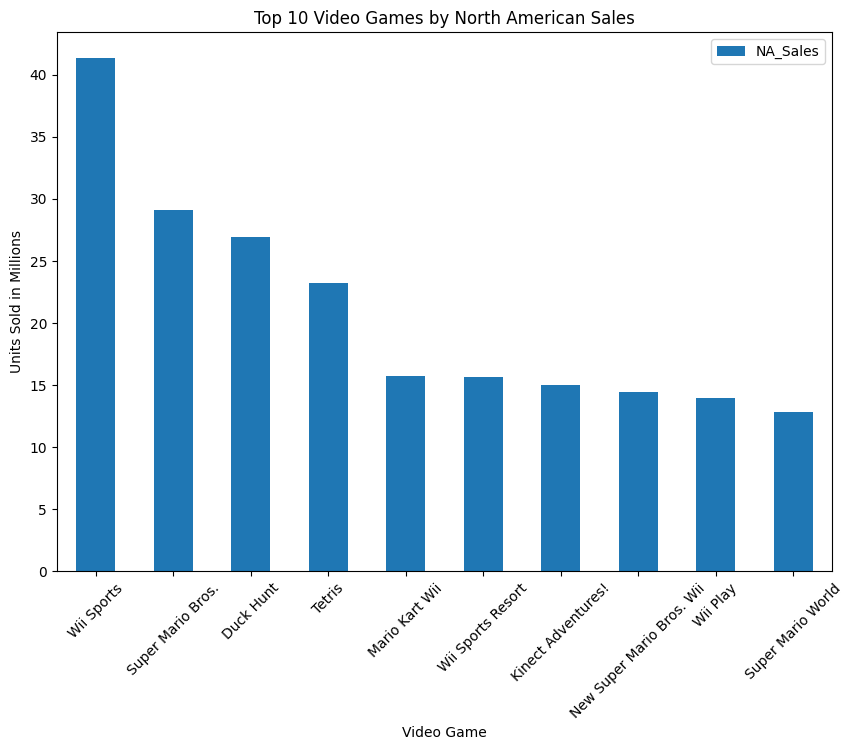

In [23]:
top_ten_na_games_by_units = df.nlargest(10, 'NA_Sales')[['Name', 'NA_Sales']]
top_ten_na_games_by_units.plot(kind='bar', x='Name', y='NA_Sales', legend=True, figsize=(10, 7))

plt.title('Top 10 Video Games by North American Sales')

plt.xlabel('Video Game')
plt.ylabel('Units Sold in Millions')

plt.xticks(rotation=45)

plt.show()

## Show the 10 most successful games in North America by units for games released after 2010.

    This is to be plotted in a bar chart.
        Display the Game Title on the 'X' axis.
        Display the units on the 'Y' axis.
        Display only the horizontal grid lines for units.


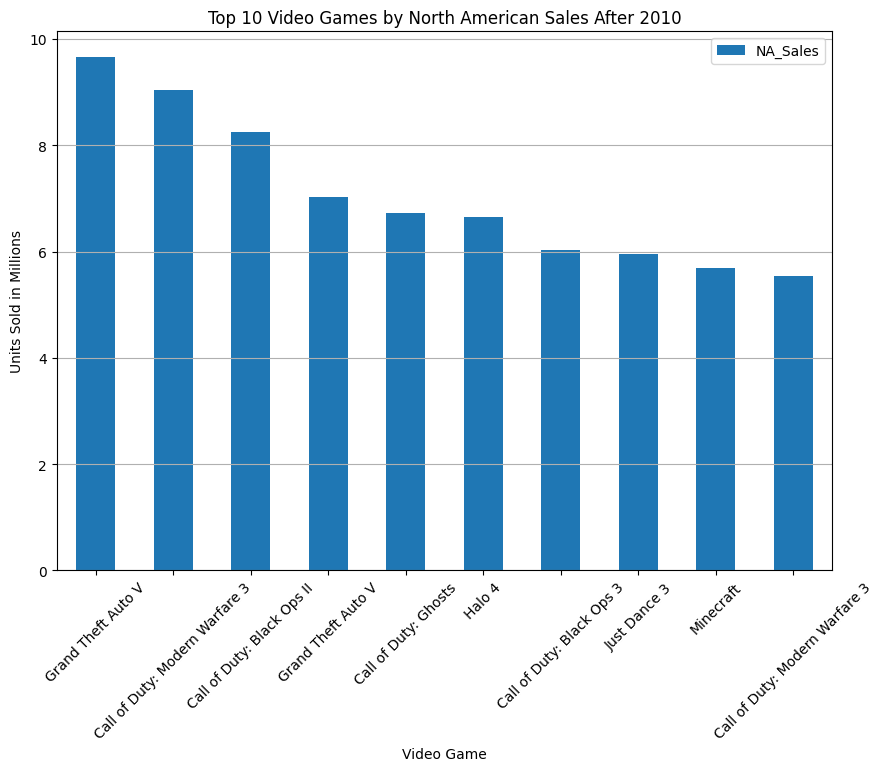

In [24]:
top_ten_na_games_after_2010 = df[df['Year_of_Release'] > 2010].nlargest(10, 'NA_Sales')[['Name', 'NA_Sales']]
top_ten_na_games_after_2010.plot(kind='bar', x='Name', y='NA_Sales', legend=True, figsize=(10, 7))

plt.title('Top 10 Video Games by North American Sales After 2010')

plt.xlabel('Video Game')
plt.ylabel('Units Sold in Millions')

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## What is the total units for all games over the years represented in the data?

    This is to be plotted in a line chart.

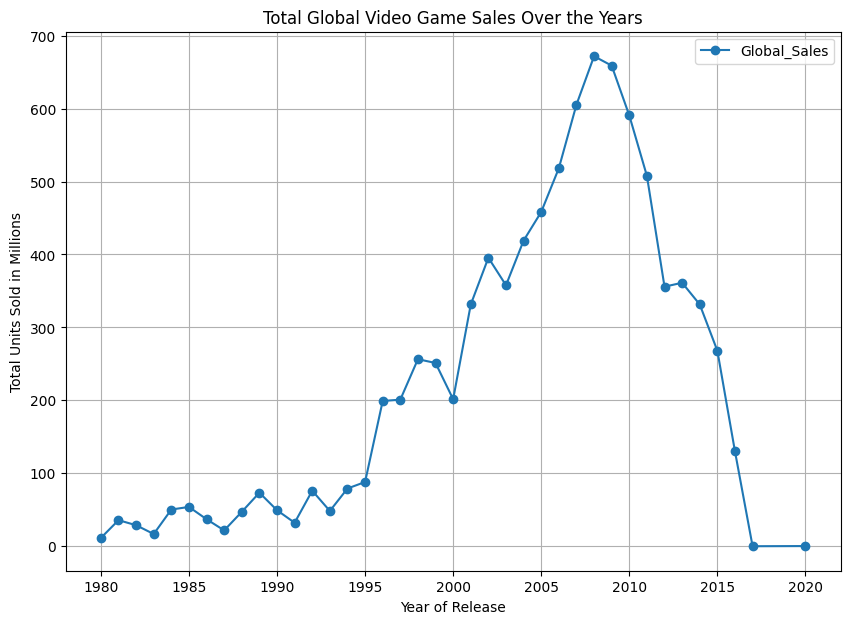

In [25]:
total_units_over_years = df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
total_units_over_years.plot(kind='line', x='Year_of_Release', y='Global_Sales', marker='o', figsize=(10, 7))

plt.title('Total Global Video Game Sales Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Units Sold in Millions')

plt.grid()
plt.show()